### Python Functions to Calculate and Plot the Lorenz Curve and Coefficient to Quantify Spatial Heterogeneity

#### The University of Texas at Austin, PGE 2020 SURI, Undergraduation Research

#### Alan Scherman, Undergraduate Student, Rice University


#### Supervised by: 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Introduction

This is a demonstration of how to calculate the Lorenz Coefficient of a subsurface sample from well log porosity and permeability measurements. The Lorenz Coefficient is an important heuristic imported form the sphere of macroeconomics used to quantify the spatial heterogeneity of a subsurface sample. The Lorenz Coefficient is obtained by doubling the area between the Lorenz Curve and the Homogeneous Line. It ranges from 0 to 1 where, by convention, a coefficient of less than 0.3 suggests low heterogeneity and a coefficient of more than 0.6 indicates high heterogeneity. In practical terms, a low spatial heterogeneity allows for simple displacement of subsurface fluids and a high recovery factor.
***
#### Objective

To understand and apply the methodology to calculate the Lorenz Curve and Coefficient from porosity and permeability measurements through Python functionalities.

***
#### Calculation procedure

The following list contains the necessary steps to determine the Lorenz Coefficient of a subsurface sample:

**(1)** Sort porosity ($\phi$) and permeability (**_k_**) in descending order of ratio **_k_**/$\phi$;

**(2)** Calculate storage (**_S.C._**) and flow capacity (**_F.C._**) of each layer (region between depth measurements) with:

<br>
\begin{equation}
S.C. = \phi*h
\end{equation}
\begin{equation}
F.C. = k*h
\end{equation}

where **_h_** is the layer thickness;

**(3)** Calculate the _cumulative_ storage (**_C.S.C._**) and flow capacities (**_C.F.C._**) of each layer with:

<br>
\begin{equation}
C.S.C. = \sum^{current layer}_{i = 1} \phi*h
\end{equation}
\begin{equation}
C.F.C. = \sum^{current layer}_{i = 1} k*h
\end{equation}

**(4)** Normalize the cumulative storage and flow capacities by dividing them by the largest cumulative storage and flow capacities (i.e. the last cumulative capacities calculated), respectively;

**(5)** _(Optional)_ Plot the normalized cumulative flow capacities against the normalized cumulative storage capacities (i.e. the Lorenz Curve);

**(6)** Find a curve fit for the normalized capacities in the Cartesian plane (usually a 3rd degree polynomial is sufficient);

**(7)** Integrate to find the area between the Lorenz Curve and the Homogenous Line;

**(8)** Divide the result found in **(7)** by 0.5 to obtain the Lorenz Coefficient:


\begin{equation}
LorenzCoefficient = \frac{\int^{1}_{0} (LorenzCurve - HomogeneousLine)}{0.5}
\end{equation}
***
#### Load the required libraries

The program below utilizes some standard Python packages. These should be previously installed if you have Anaconda or other similar software.

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

***
#### Declare function

These are the functions to:

1. calculate the Lorenz coefficent and the Lorenz curve

2. plot the Lorenz curve and display the Lorenz coeficient

In [15]:
def lorenz_coefficient(poros, perme, layer_thick = 0.25, depth = None, curve_plot = False):
   
    """Calculates Lorenz coefficient and curve of subsurface sample given porosity and permeability data.
    :param poros: porosities in %
    :type: 1D numpy.ndarray
    :param perme: permeabilities in mD
    :type: 1D numpy.ndarray
    :param layer_thick: uniform layer thickness; default 0.25 m;
                        if depth is not None, layer_thick is recalculated
    :type: int or float
    :param depth: default None for constant thickness; 
                  for variable layer thickness, enter 1D numpy.ndarray of depths in m
    :param curve_plot: default False; set to True to display the Lorenz Curve
    :type: boolean
    :return:lorenz_coeff: Lorenz Coefficient rounded to 3 decimal places
           :type: float
           :lorenz_plot: (optional) figure with plot of Lorenz Curve   
    """
        
    # Converting to row-oriented numpy.ndarrays (if necessary)
    
    if np.ndim(depth) == 2:
        depth = np.transpose(depth)[0,:]
    if np.ndim(poros) == 2:
        poros = np.transpose(poros)[0,:]
    if np.ndim(perme) == 2:
        perme = np.transpose(perme)[0,:]
   
    # Determining layer thickness array
    
    if depth is not None:
        layer_thick = depth - np.concatenate(([0],depth[:-1]))
    else:
        layer_thick = np.ones(len(poros))*layer_thick    
        
    # Exception handling
    
    if (all(isinstance(x, (int, float)) for x in layer_thick) or all(isinstance(x, (int, float)) for x in poros) or all(isinstance(x, (int, float)) for x in perme)) == False:
        raise TypeError('Not all array entries are integers or floats')
    
    elif len(layer_thick) != len(poros) or len(layer_thick) != len(perme):
        raise TypeError('There are not sufficient porosity/permeability measurements for all layers')
        
    elif (np.ndim(layer_thick) or np.ndim(poros) or np.ndim(perme)) != 1:
        raise TypeError('Arguments should be 1D numpy.ndarrays')
    
    # Sorting data in descending order of perme/poros
    
    ratio = perme/poros
    layer_thick = np.flip(layer_thick[np.argsort(ratio)], axis = 0)
    poros = np.flip(poros[np.argsort(ratio)], axis = 0)
    perme = np.flip(perme[np.argsort(ratio)], axis = 0)
    
    # Flow and storage capacities
    
    storage_cap = poros*layer_thick
    flow_cap = perme*layer_thick
    
    # Cumulative flow and storage capacities
    
    cumul_storage_cap = np.zeros(len(flow_cap)+1)
    cumul_flow_cap = np.zeros(len(flow_cap)+1)
    
    cumul_storage_cap[1] = storage_cap[0]
    cumul_flow_cap[1] = flow_cap[0]
        
    for i in range(2,len(flow_cap)+1):
        cumul_storage_cap[i] = cumul_storage_cap[i-1] + storage_cap[i-1]
        cumul_flow_cap[i] = cumul_flow_cap[i-1] + flow_cap[i-1]
                     
    # Fractional flow and storage capacities
    
    frac_storage_cap = cumul_storage_cap/cumul_storage_cap[-1]
    frac_flow_cap = cumul_flow_cap/cumul_flow_cap[-1]
       
    # Curve fitting
    
    weights = np.ones(len(frac_storage_cap)) # To ensure the fit converges to (0,0) and (1,1)
    weights[0] = 1000; weights[-1] = 1000 
    
    poly_fit = np.polyfit(frac_storage_cap, frac_flow_cap, deg=3, w=weights)
    
    poly_fit = np.poly1d(poly_fit)
    integral = np.polyint(poly_fit) 
    lorenz_coeff = (integral(1) - 0.5)/0.5
    
    if curve_plot == True:                                                    # To output Lorenz Curve plot                           
         
        # Plotting instructions 
        
        lorenz_plot = plt.figure(figsize = (16,12))

        plt.style.use('fivethirtyeight')

        plt.plot([0,1],[0,1], label='Homogeneous Curve', color = 'red', linewidth = '3')
        plt.plot(np.linspace(0,1,100), poly_fit(np.linspace(0,1,100)), linestyle = 'dashed', \
                 linewidth = '3', label = 'Polynomial Fit', color = 'black')
        plt.fill_between(np.linspace(0,1,100), poly_fit(np.linspace(0,1,100)), np.linspace(0,1,100), alpha = 0.75)
        plt.fill_between(np.linspace(0,1,100), poly_fit(np.linspace(0,1,100)), 1, alpha = 0.75, color = 'orange')
    
        plt.title('Lorenz Curve and Coefficient', size = 50)
        plt.xlabel('Fraction of Total Storage Capacity (m)', size = 36)
        plt.ylabel('Fraction of Total Flow Capacity (mD*m)', size = 36)
        plt.legend(loc = 4, facecolor = '#C0C0C0', fontsize = 25)
        plt.text(0.3, 0.7, 'lorenz_coeff = \n %.3f' %lorenz_coeff, size = 40, horizontalalignment = 'center', \
                 bbox=dict(facecolor='none', edgecolor='black'))
        plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.3, hspace=0.3)
        plt.show()
           
    else:                                                                   # To output only Lorenz Coefficient
        return 'lorenz_coeff = %.3f' %lorenz_coeff

***
#### Docstrings

In [19]:
print(lorenz_coefficient.__doc__)

Calculates Lorenz coefficient and curve of subsurface sample given porosity and permeability data.
    :param poros: porosities in %
    :type: 1D numpy.ndarray
    :param perme: permeabilities in mD
    :type: 1D numpy.ndarray
    :param layer_thick: uniform layer thickness; default 0.25 m;
                        if depth is not None, layer_thick is recalculated
    :type: int or float
    :param depth: default None for constant thickness; 
                  for variable layer thickness, enter 1D numpy.ndarray of depths in m
    :param curve_plot: default False; set to True to display the Lorenz Curve
    :type: boolean
    :return:lorenz_coeff: Lorenz Coefficient rounded to 3 decimal places
           :type: float
           :lorenz_plot: (optional) figure with plot of Lorenz Curve   
    


***
#### Examples

#### E.g. 1: Lorenz coefficient with default parameters (Data set 1)

In [20]:
df = pd.read_excel('WellPorPermSample_1.xlsx')
poros1 = pd.DataFrame(df, columns = ['Por (%)']); poros1 = poros1.to_numpy()
perme1 = pd.DataFrame(df, columns = ['Perm (mD)']); perme1 = perme1.to_numpy()

lorenz_coefficient(poros1, perme1)

'lorenz_coeff = 0.171'

#### E.g. 2: Lorenz curve and coefficient with irregular thicknesses (Data set 2)

C:\Users\mpyrc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


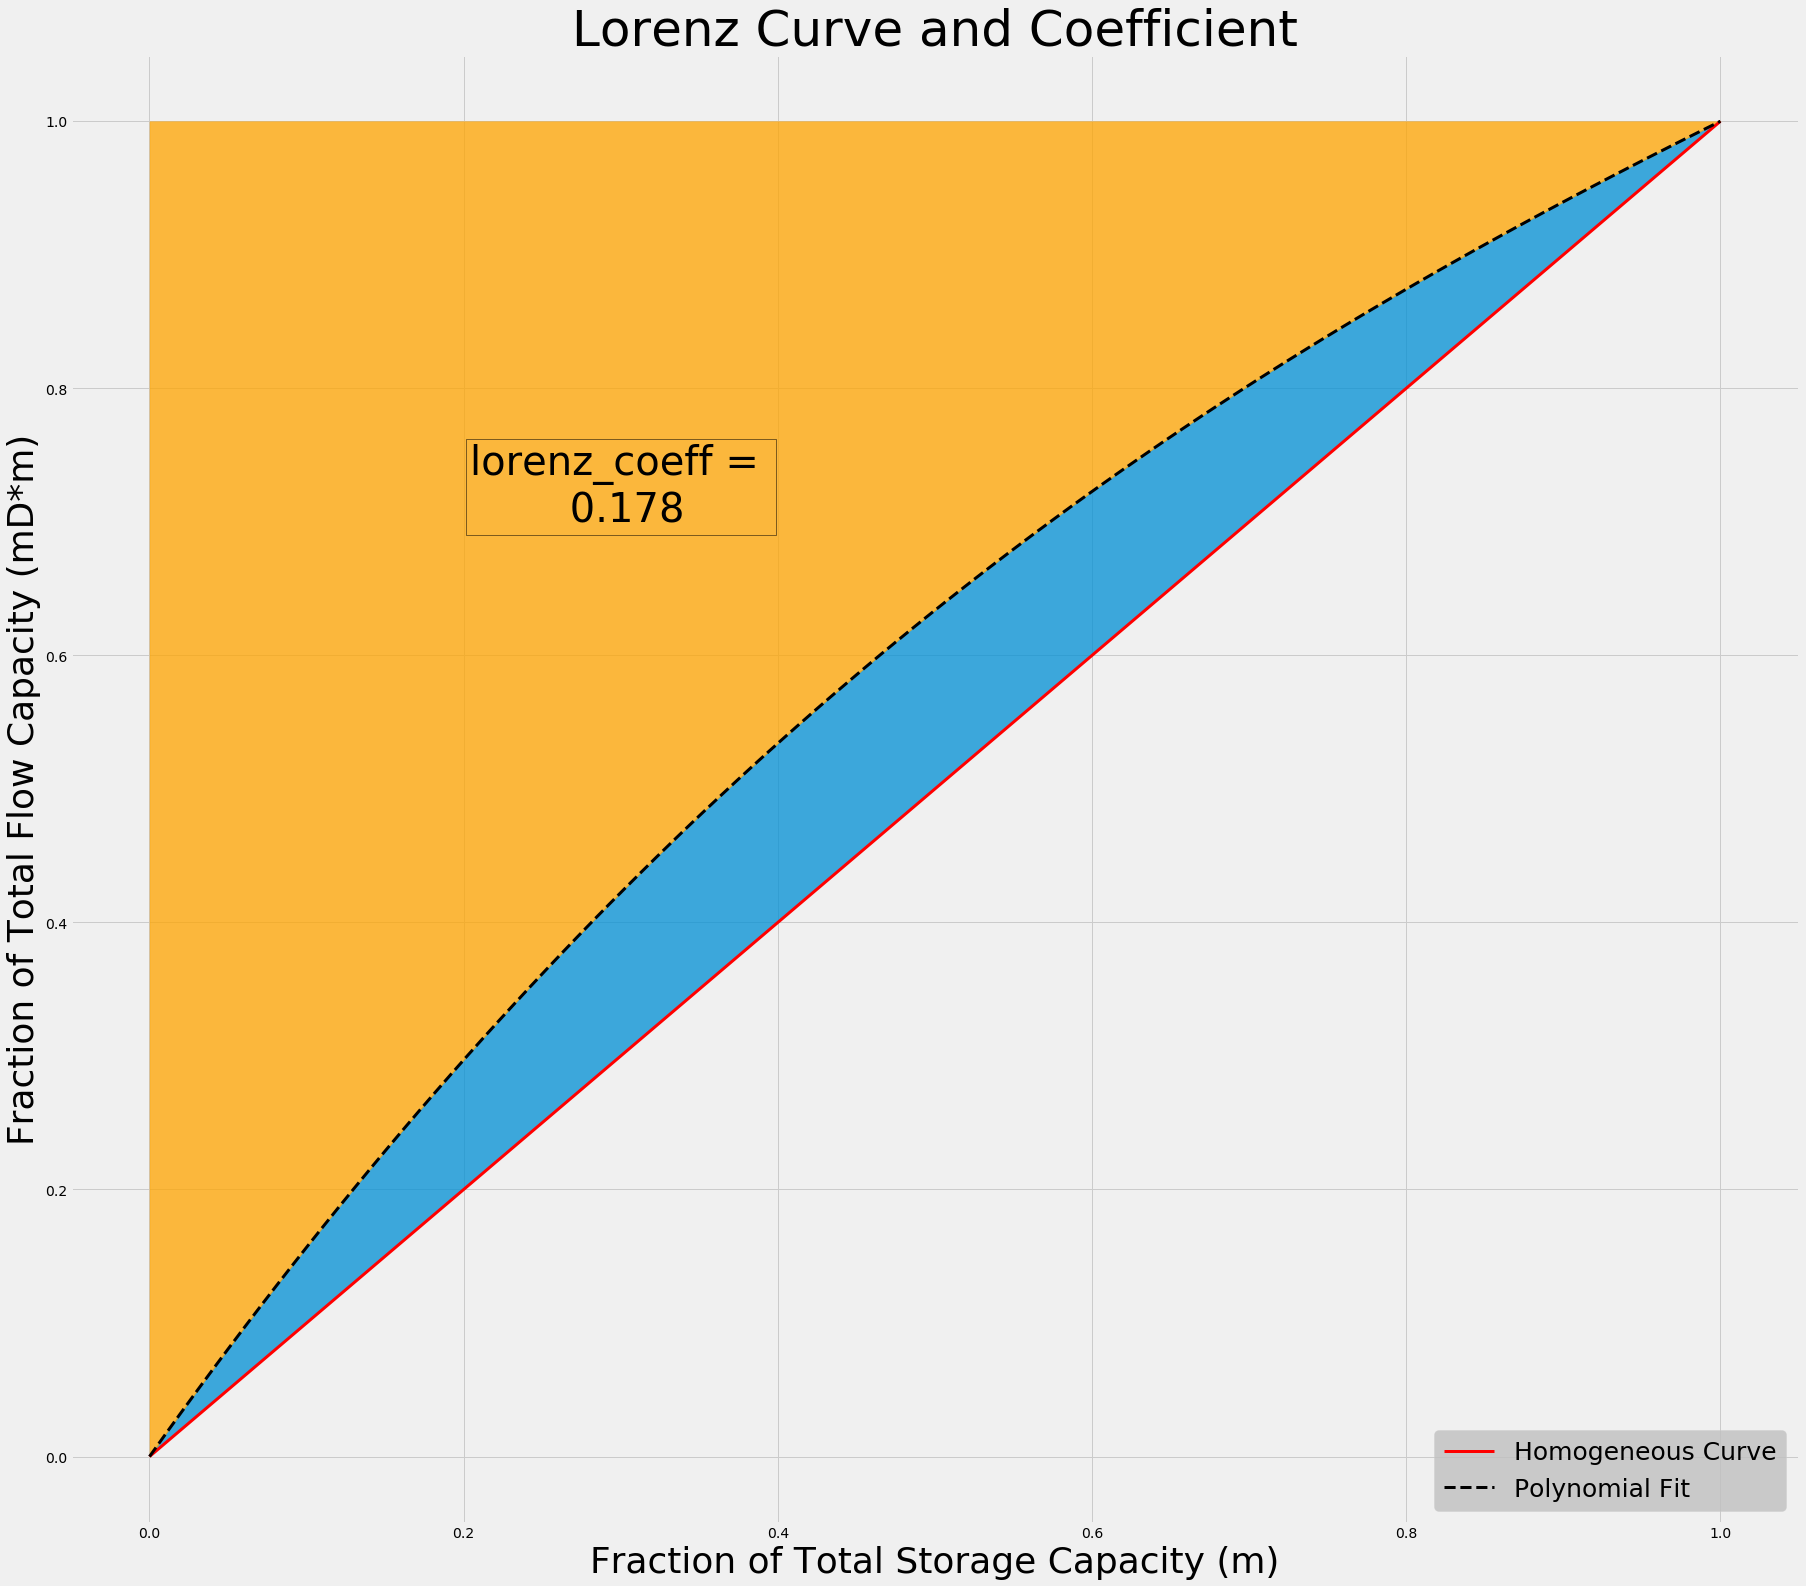

In [21]:
df = pd.read_excel('WellPorPermSample_2.xlsx')
depth2 = pd.DataFrame(df, columns = ['Depth (m)']); depth2 = depth2.to_numpy()
poros2 = pd.DataFrame(df, columns = ['Por (%)']); poros2 = poros2.to_numpy()
perme2 = pd.DataFrame(df, columns = ['Perm (mD)']); perme2 = perme2.to_numpy()

lorenz_coefficient(poros2, perme2, depth = depth2, curve_plot = True)

#### E.g. 3: Lorenz coefficient with customized uniform thickness (Data set 3)

In [14]:
df = pd.read_excel('WellPorPermSample_3.xlsx')
depth3 = pd.DataFrame(df, columns = ['Depth (m)']); depth3 = depth3.to_numpy()
poros3 = pd.DataFrame(df, columns = ['Por (%)']); poros3 = poros3.to_numpy()
perme3 = pd.DataFrame(df, columns = ['Perm (mD)']); perme3 = perme3.to_numpy()

lorenz_coefficient(poros3, perme3, layer_thick = 1.5)

'lorenz_coeff = 0.192'

#### Comments

This is a set of functions to calculate and plot the Lorenz coefficient. Appreciation to **Alan Scherman** for writing this code and providing this documentation as part of the SURI program at The University of Texas at Austin.  

If you want to learn more about data analytics and machine learning in Python, The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
